 Relevant information

	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].


	This database is also available through the UW CS ftp server:

	ftp ftp.cs.wisc.edu
	cd math-prog/cpo-dataset/machine-learn/WDBC/

Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

# Cleaning, transforming and visualizing

## Data Wrangling:Exploratory Data Analysis
### Ensure that in doing so, NAN values are dealt with appropriately

    Cleaning, transforming and visualizing
1 Data Wrangling:Exploratory Data Analysis  
2 Preliminary Observations
3 Exploring Numerical Data
4 Exploring Categorical Data

    Data Cleaning and Preprocessing
1 Handling Skew


In [186]:
#necesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
import statsmodels.api as sm
import random
import math

In [187]:
cancer=pd.read_csv('breast-cancer-data.csv')

In [5]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
cancer.shape

(569, 33)

### first column must be set as column index

In [8]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [97]:
# code to remove last column,used somewhere else, keeping it just in case: loan_data_2007_11.iloc[: , :-1]

In [10]:
#count empty cells
cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [98]:
#drop nan values
cancer.dropna(how = 'all')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B,M
0,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,0.05935,...,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127,1,0
1,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,104.50,819.1,0.11260,0.1737,0.1362,0.08178,0.2487,0.06766,1,0
2,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,0.05916,...,93.85,624.6,0.13680,0.2170,0.2413,0.08829,0.3218,0.07470,1,0
3,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,0.05701,...,93.76,663.5,0.12130,0.1676,0.1364,0.06987,0.2741,0.07582,1,0
4,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,117.20,1009.0,0.13380,0.1679,0.1663,0.09123,0.2394,0.06469,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,...,91.93,591.7,0.13850,0.4092,0.4504,0.18650,0.5774,0.10300,0,1
565,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,...,91.76,508.1,0.21840,0.9379,0.8402,0.25240,0.4154,0.14030,0,1
566,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,129.00,1233.0,0.13140,0.2236,0.2802,0.12160,0.2792,0.08158,0,1
567,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,...,121.40,971.4,0.14110,0.2164,0.3355,0.16670,0.3414,0.07147,0,1


### there is no nan value

In [13]:
#sort diagnosis to see if using this values is helpful
cancer=cancer.sort_values(by='diagnosis')

In [188]:
cancer.reset_index(inplace = True,drop = True)

In [15]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

 # Exploring Numerical Data

#### we can select and round "only" float type data for practice

In [113]:
numeric=cancer.select_dtypes(include=['float64']).round(4)

In [17]:
numeric

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,12.89,15.70,84.08,516.6,0.0782,0.0958,0.1115,0.0339,0.1432,0.0594,...,19.69,92.12,595.6,0.0993,0.2317,0.3344,0.1017,0.1999,0.0713,NaN
1,15.19,13.21,97.65,711.8,0.0796,0.0693,0.0339,0.0266,0.1721,0.0554,...,15.73,104.50,819.1,0.1126,0.1737,0.1362,0.0818,0.2487,0.0677,NaN
2,12.21,18.02,78.31,458.4,0.0923,0.0718,0.0439,0.0203,0.1695,0.0592,...,24.04,93.85,624.6,0.1368,0.2170,0.2413,0.0883,0.3218,0.0747,NaN
3,13.40,16.95,85.48,552.4,0.0794,0.0570,0.0218,0.0147,0.1650,0.0570,...,21.70,93.76,663.5,0.1213,0.1676,0.1364,0.0699,0.2741,0.0758,NaN
4,16.50,18.29,106.60,838.1,0.0969,0.0847,0.0586,0.0483,0.1495,0.0559,...,25.45,117.20,1009.0,0.1338,0.1679,0.1663,0.0912,0.2394,0.0647,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,11.80,16.58,78.99,432.0,0.1091,0.1700,0.1659,0.0741,0.2678,0.0737,...,26.38,91.93,591.7,0.1385,0.4092,0.4504,0.1865,0.5774,0.1030,NaN
565,11.08,18.83,73.30,361.6,0.1216,0.2154,0.1689,0.0637,0.2196,0.0795,...,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.1403,NaN
566,16.11,18.05,105.10,813.0,0.0972,0.1137,0.0945,0.0594,0.1861,0.0625,...,25.27,129.00,1233.0,0.1314,0.2236,0.2802,0.1216,0.2792,0.0816,NaN
567,14.95,17.57,96.85,678.1,0.1167,0.1305,0.1539,0.0862,0.1957,0.0622,...,21.43,121.40,971.4,0.1411,0.2164,0.3355,0.1667,0.3414,0.0715,NaN


#### select only columns which ends with 'mean' word using .loc just for practice

In [114]:
means=cancer.loc[:, cancer.columns.str.endswith('mean')]
means

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


### describe and round resulting numeric data

In [138]:
numeric_describe=numeric.describe().round(4)
numeric_describe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.0000,569.0000,569.000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,...,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,0.0
mean,14.1273,19.2896,91.969,654.8891,0.0964,0.1043,0.0888,0.0489,0.1812,0.0628,...,25.6772,107.2612,880.5831,0.1324,0.2543,0.2722,0.1146,0.2901,0.0839,NaN
std,3.5240,4.3010,24.299,351.9141,0.0141,0.0528,0.0797,0.0388,0.0274,0.0071,...,6.1463,33.6025,569.3570,0.0228,0.1573,0.2086,0.0657,0.0619,0.0181,NaN
min,6.9810,9.7100,43.790,143.5000,0.0526,0.0194,0.0000,0.0000,0.1060,0.0500,...,12.0200,50.4100,185.2000,0.0712,0.0273,0.0000,0.0000,0.1565,0.0550,NaN
25%,11.7000,16.1700,75.170,420.3000,0.0864,0.0649,0.0296,0.0203,0.1619,0.0577,...,21.0800,84.1100,515.3000,0.1166,0.1472,0.1145,0.0649,0.2504,0.0715,NaN
50%,13.3700,18.8400,86.240,551.1000,0.0959,0.0926,0.0615,0.0335,0.1792,0.0615,...,25.4100,97.6600,686.5000,0.1313,0.2119,0.2267,0.0999,0.2822,0.0800,NaN
75%,15.7800,21.8000,104.100,782.7000,0.1053,0.1304,0.1307,0.0740,0.1957,0.0661,...,29.7200,125.4000,1084.0000,0.1460,0.3391,0.3829,0.1614,0.3179,0.0921,NaN
max,28.1100,39.2800,188.500,2501.0000,0.1634,0.3454,0.4268,0.2012,0.3040,0.0974,...,49.5400,251.2000,4254.0000,0.2226,1.0580,1.2520,0.2910,0.6638,0.2075,NaN


#### how can i floor the values in 'describe' i tried a lot of different methods

In [137]:
numeric_list=numeric_describe.values.tolist()
math.floor(numeric_list)

TypeError: must be real number, not list

### let's see correlation matrix without id column for later

In [190]:
cancer=cancer.iloc[:,cancer.columns!='id']

### drop unnamed column

In [191]:
cancer['Unnamed: 32'].isna().sum()

569

In [192]:
cancer=cancer.iloc[:,cancer.columns!='Unnamed: 32']

## Feature Selection and Engineering

In [193]:
#Diagnosis (M = malignant, B = benign)
cancer.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [194]:
#produce dummy variables for diagnosis result to be able to use while modeling
enc = OneHotEncoder(handle_unknown='ignore')
train_dummies = pd.get_dummies(cancer['diagnosis'])

In [195]:
#merge diagnosis dummies with our cancer dataframe so that we can analyze cause and result
cancer=pd.concat([cancer, train_dummies], axis=1).drop(['diagnosis'],axis=1)

In [27]:
cancer

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B,M
0,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,0.05935,...,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127,1,0
1,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,104.50,819.1,0.11260,0.1737,0.1362,0.08178,0.2487,0.06766,1,0
2,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,0.05916,...,93.85,624.6,0.13680,0.2170,0.2413,0.08829,0.3218,0.07470,1,0
3,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,0.05701,...,93.76,663.5,0.12130,0.1676,0.1364,0.06987,0.2741,0.07582,1,0
4,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,117.20,1009.0,0.13380,0.1679,0.1663,0.09123,0.2394,0.06469,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,...,91.93,591.7,0.13850,0.4092,0.4504,0.18650,0.5774,0.10300,0,1
565,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,...,91.76,508.1,0.21840,0.9379,0.8402,0.25240,0.4154,0.14030,0,1
566,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,129.00,1233.0,0.13140,0.2236,0.2802,0.12160,0.2792,0.08158,0,1
567,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,...,121.40,971.4,0.14110,0.2164,0.3355,0.16670,0.3414,0.07147,0,1


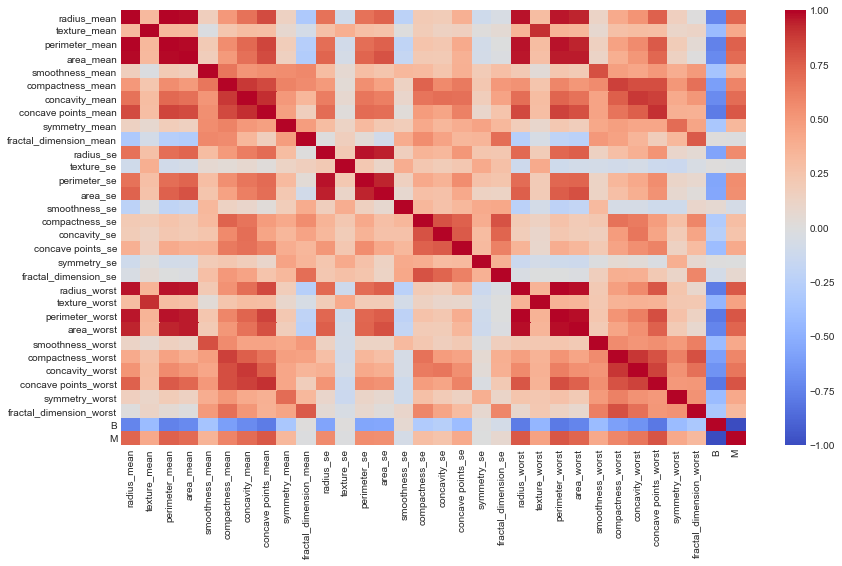

In [196]:
corrMatrix=cancer.corr()
plt.figure(figsize=(14,8))
sns.heatmap(data=corrMatrix,vmin=-1,
            cmap='coolwarm',
            annot=False)
plt.show()

In [139]:
cancer=cancer.reindex()

#### pie chart of B and M results of cancer patients

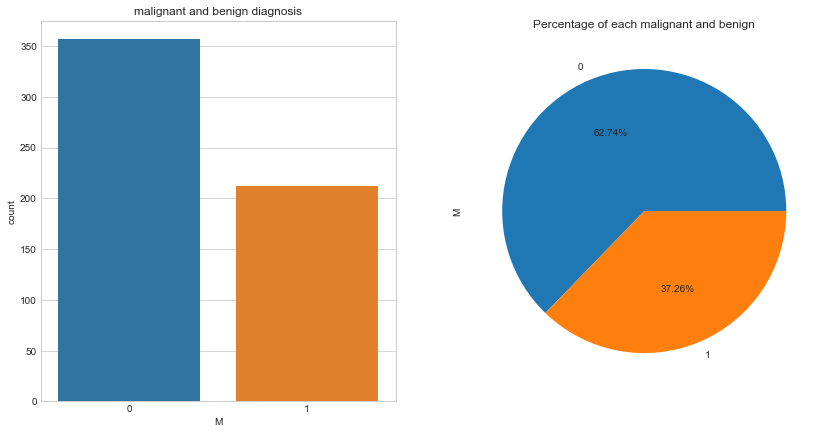

In [197]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='M',data=cancer,ax=axs[0])
axs[0].set_title("malignant and benign diagnosis")
cancer.M.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each malignant and benign")
plt.show()

# Modelling
### Data Cleaning and Preprocessing

let's test if the

In [198]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [202]:
# train test split data
X, y = cancer['B'], cancer['concave points_mean']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [203]:
random_state = 2
classifiers = [Lasso(),LinearRegression(),Ridge(),ElasticNet(),
              ElasticNet(random_state=random_state),KNeighborsRegressor(),SVR(),RandomForestRegressor(random_state=random_state)]
classifiers.append(GradientBoostingRegressor())
classifiers.append(AdaBoostRegressor())
classifiers.append(DecisionTreeRegressor())
classifiers.append(XGBRegressor())
classifiers

[Lasso(),
 LinearRegression(),
 Ridge(),
 ElasticNet(),
 ElasticNet(random_state=2),
 KNeighborsRegressor(),
 SVR(),
 RandomForestRegressor(random_state=2),
 GradientBoostingRegressor(),
 AdaBoostRegressor(),
 DecisionTreeRegressor(),
 XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)]

In [65]:
#calculate all scores
cv_means = []
cv_std = []
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X, y, scoring='neg_mean_squared_error', cv =10, n_jobs=4))
    
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [171]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [182]:
#different method
for name, model in classifiers:
    kfold = model_selection.KFold(n_splits=10, random_state=random_state)
    cv_results = model_selection.cross_val_score(classifiers, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TypeError: cannot unpack non-iterable Lasso object

In [204]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Lasso","LinearRegression",
    "Ridge","ElasticNet","KNeighborsRegressor","SVR","RandomForestRegressor","GradientBoostingRegressor",
    "AdaBoostRegressor","DecisionTreeRegressor", "XGBRegressor"]})

ValueError: All arrays must be of the same length

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X, y)
X_std


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [175]:
model = sm.OLS()
results = model(y_train,X_train).fit()
print(results.summary())

TypeError: __init__() missing 1 required positional argument: 'endog'

# Conclusions